In [1]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from mads_telemarketing_assignment.config import (
    DATA_FILENAME,
    PROCESSED_DATA_DIR,
)

In [2]:
# Various variables used in the code
random_state = 42

In [3]:
# Load  processed dataset
df = pd.read_csv(PROCESSED_DATA_DIR / DATA_FILENAME)

In [4]:
df = df.drop(
    columns=[
        "month",
        "day_of_week",
        "emp.var.rate",
        "cons.price.idx",
        "cons.conf.idx",
        "euribor3m",
        "nr.employed",
    ]
)

df

,age,job,marital,education,default,housing,loan,contact,campaign,y
0,39,admin.,single,university.degree,no,yes,no,telephone,1,1
1,60,technician,married,university.degree,no,yes,no,telephone,1,0
2,30,blue-collar,married,high.school,no,yes,no,telephone,1,1
3,78,retired,divorced,professional.course,no,yes,no,cellular,1,1
4,31,admin.,divorced,professional.course,no,yes,no,cellular,1,0
...,...,...,...,...,...,...,...,...,...,...
1328,73,retired,married,professional.course,no,yes,no,cellular,1,1
1329,46,blue-collar,married,professional.course,no,no,no,cellular,1,0
1330,56,retired,married,university.degree,no,yes,no,cellular,2,0
1331,44,technician,married,professional.course,no,no,no,cellular,1,1


In [5]:
# Define X and y for modeling
X = df.drop(columns=["y"], axis=1)
y = df["y"]

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1333, 9), y shape: (1333,)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=random_state,
    shuffle=True,
    stratify=y,  # Ensure the split maintains the class distribution
    test_size=0.2,  # 20% of the data for testing
)

# Convert to numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [7]:
# Transform features to prepare for modelling
transformer = ColumnTransformer(
    [
        (
            "categorical",
            OneHotEncoder(
                sparse_output=False,
                handle_unknown="ignore",
            ),
            [
                "contact",
                "default",
                "education",
                "housing",
                "job",
                "loan",
                "marital",
            ],
        ),
    ],
    remainder=StandardScaler(),
)
X_train = transformer.fit_transform(X_train)

In [8]:
# # Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=random_state, sampling_strategy=0.5)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# print(f"X shape: {X.shape}, y shape: {y.shape}")

In [9]:
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(random_state=random_state)
model_name = "Random Forest"

In [10]:
# Define dictionary to store results of each classifier
probabilities = {}
predictions = {}

# Prepare an array to store predictions for all training samples
y_probs = np.zeros(len(y_train))
y_preds = np.zeros(len(y_train))

# Fit the pipeline on the training fold
classifier.fit(X_train, y_train)

# Transform the test set
X_test = transformer.transform(X_test)

# Make and store probabilities and predictions for the test fold
y_probs = classifier.predict_proba(X_test)[:, 1]
y_preds = classifier.predict(X_test)

print("✅ Modelling completed.")

✅ Modelling completed.


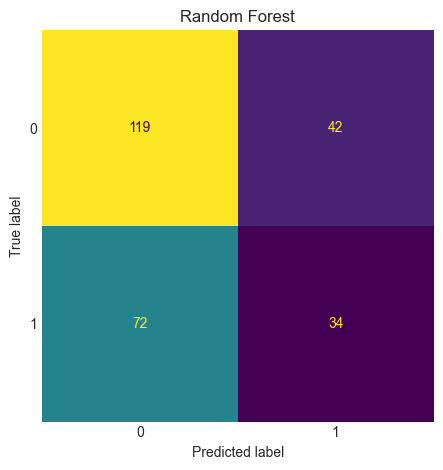

In [11]:
plt.style.use("seaborn-v0_8-dark")

_, ax = plt.subplots()

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_preds,
    ax=ax,
    colorbar=False,
)
ax.set_title(model_name)

plt.tight_layout()
plt.show()

In [12]:
# Display the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68       161
           1       0.45      0.32      0.37       106

    accuracy                           0.57       267
   macro avg       0.54      0.53      0.52       267
weighted avg       0.55      0.57      0.56       267

